<a href="https://colab.research.google.com/github/vkjdinesh/Reseacrh/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed May 26 11:34:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import pandas as pd
import math
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
from socket import socket
import seaborn as sns

In [ ]:
train_dataset = datasets.MNIST('.', download= True, train= True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST('.', download= True, train= False, transform=transforms.ToTensor())

In [ ]:
len(train_dataset), len(test_dataset)

(60000, 10000)

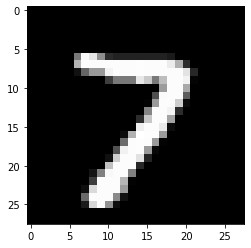

In [ ]:
plt.imshow(train_dataset[4000][0].view(28,28),cmap='gray')

In [ ]:
#binary classification
selectedlabel = {4:0, 8:1}
selectedlabel


{4: 0, 8: 1}

In [ ]:
train_dataset = [(img, selectedlabel[lbl]) for img,lbl in train_dataset if lbl in [4,8]]
test_dataset = [(img, selectedlabel[lbl]) for img,lbl in test_dataset if lbl in [4,8]]

In [ ]:
len(train_dataset), len(test_dataset)

(11693, 1956)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

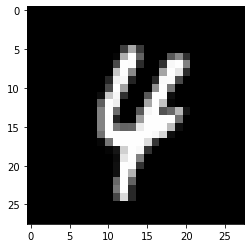

In [ ]:
plt.imshow(train_dataset[2000][0].reshape(28,28), cmap= 'gray' )

In [ ]:
#CNN implementation
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1,9,3,stride=1,padding=1)
        self.conv2 = nn.Conv2d(9,18,3, stride=1,padding=1)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(18*7*7, 32)
        self.fc2 = nn.Linear(32,2)
    def forward(self,x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.relu(self.fc1(x.view(-1, 18*7*7)))
        x = self.fc2(x)
        return x

In [ ]:
model = ConvNet().cuda()

In [ ]:
model

ConvNet(
  (conv1): Conv2d(1, 9, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(9, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=882, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [ ]:
model(train_dataset[1000][0].unsqueeze(0).cuda())

tensor([[ 0.1252, -0.1205]], device='cuda:0', grad_fn=<AddmmBackward>)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for epoch in range(10):
  for img, lbl in train_loader:
      img = img.cuda()
      lbl = lbl.cuda()
      y_pred = model(img)
      loss = criterion(y_pred, lbl)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
  if epoch%2==0:
      model.eval()
      correct=0
      total=0
      for img,lbl in valid_loader:
        img = img.cuda()
        lbl = lbl.cuda()
        y_pred = model(img)
        preds = torch.argmax(y_pred,1)
        correct += (preds == lbl).sum()
        total +=len(lbl)
      print(epoch, correct/total)    



0 tensor(0.9913, device='cuda:0')
2 tensor(0.9980, device='cuda:0')
4 tensor(0.9985, device='cuda:0')
6 tensor(0.9985, device='cuda:0')
8 tensor(0.9990, device='cuda:0')


In [ ]:
print(model.conv1.weight.shape)
print(model.conv2.weight.shape)
print(model.pool)

torch.Size([9, 1, 3, 3])
torch.Size([18, 9, 3, 3])
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [ ]:
img = train_dataset[3000][0].unsqueeze(0).cuda()

In [ ]:
model(img)

tensor([[-13.7549,   9.3638]], device='cuda:0', grad_fn=<AddmmBackward>)

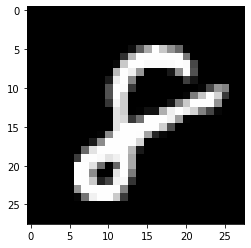

In [ ]:
plt.imshow(img.view(28,28).detach().cpu(), cmap = "gray")

In [ ]:
conv1_res = model.conv1(img)
conv1_res.shape

torch.Size([1, 9, 28, 28])

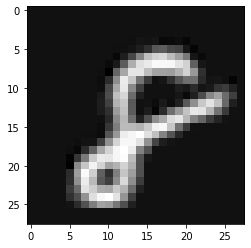

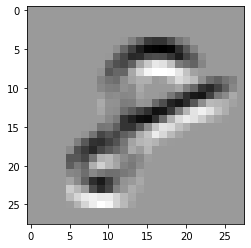

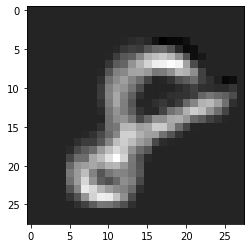

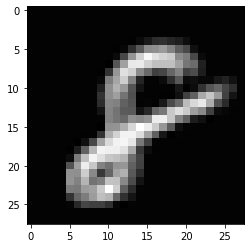

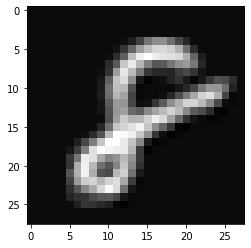

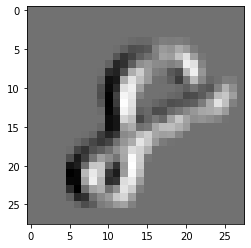

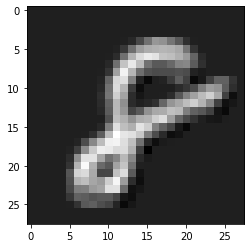

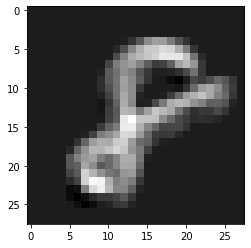

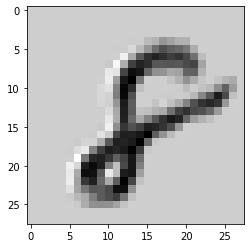

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(9):
  plt.imshow(conv1_res[0][i].detach().cpu(), cmap= 'gray')
  plt.figure()

In [ ]:
conv1_maps = []
conv2_maps = []
final_inputs = []
final_outputs = []

def conv1_acti_maps(self, input, output):
  print(input[0].size())
  print(output.size())
  conv1_maps.append(output)

def conv2_acti_maps(self, input, output):
  print(input[0].size())
  print(output.size())
  conv2_maps.append(output)

def fc_res(self, input, output):
  print(input[0].size())
  print(output.size())
  final_inputs.append(input[0])
  final_outputs.append(output)

In [ ]:
model.conv1.register_forward_hook(conv1_acti_maps)
model.conv2.register_forward_hook(conv2_acti_maps)
model.fc2.register_forward_hook(fc_res)

In [ ]:
model(img)

torch.Size([1, 1, 28, 28])
torch.Size([1, 9, 28, 28])
torch.Size([1, 9, 14, 14])
torch.Size([1, 18, 14, 14])
torch.Size([1, 32])
torch.Size([1, 2])


tensor([[-9.3175,  9.2890]], device='cuda:0', grad_fn=<AddmmBackward>)

In [ ]:
def plt_convolutions(conv_list):
  n,c,h,w = conv_list.shape
  conv_list = conv_list.view(c,h,w)
  for i in range(c):
      plt.imshow(conv_list[i], cmap="gray")
      plt.figure()

In [ ]:
len(conv2_maps)

1

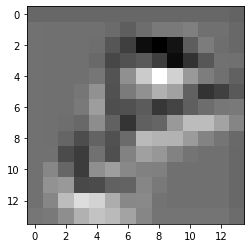

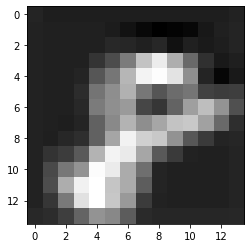

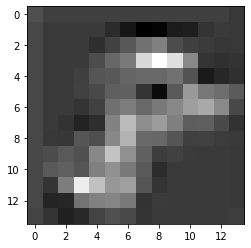

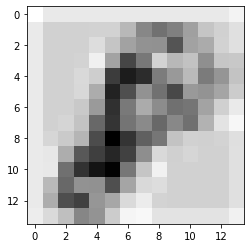

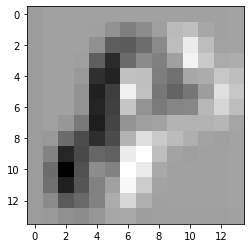

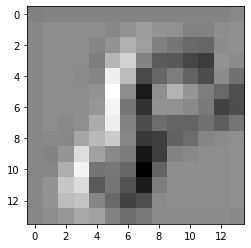

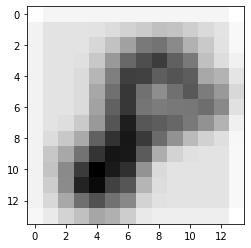

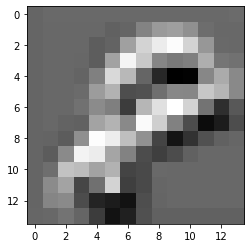

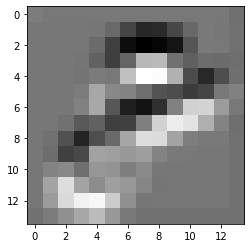

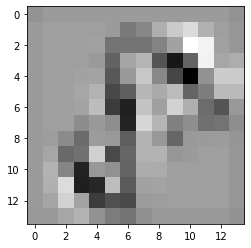

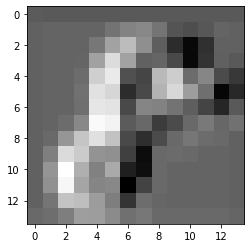

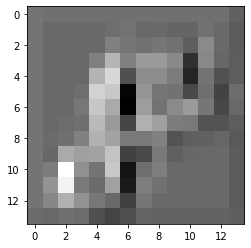

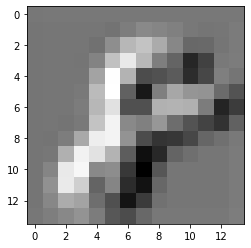

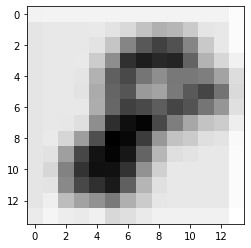

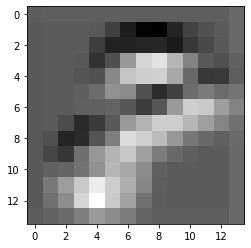

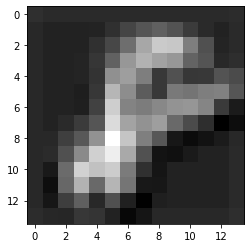

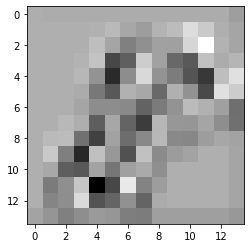

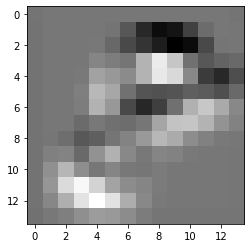

<Figure size 432x288 with 0 Axes>

In [ ]:
plt_convolutions(conv2_maps[0].detach().cpu())

In [ ]:
final_inputs

[tensor([[4.4982, 4.2462, 0.2111, 0.0000, 0.0000, 0.0000, 4.4973, 0.1895, 4.0396,
          4.1758, 0.5775, 0.6806, 4.4517, 0.0000, 0.6900, 0.0000, 0.0000, 0.0000,
          4.4627, 4.3859, 0.0000, 0.0000, 4.0264, 4.7397, 4.6268, 4.3419, 4.3167,
          0.2967, 0.0000, 0.0000, 0.0000, 0.0000]], device='cuda:0',
        grad_fn=<ReluBackward0>)]

In [ ]:
final_outputs

[tensor([[-9.3175,  9.2890]], device='cuda:0', grad_fn=<AddmmBackward>)]